$$
Ax = b \Rightarrow \tilde{x} = (AA^T)^{-1}A^Tb
$$

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng

In [29]:
size = 10000
training_data_percentage = 0.7
rng = default_rng()

In [30]:
x1 = rng.normal(0, 1, size=size)
x1

array([-0.14936325, -0.53553995,  2.36703987, ..., -1.81361977,
       -0.4767743 ,  0.99729922])

In [31]:
x2 = rng.normal(0, 1, size=size)
x2

array([-0.29815787,  1.34095559, -0.66003615, ...,  0.26308523,
       -1.78735336, -0.67034098])

In [32]:
x3 = x1 - x2 + rng.normal(0, 10e-10, size=size)
x3

array([ 0.14879463, -1.87649554,  3.02707603, ..., -2.07670499,
        1.31057907,  1.66764019])

In [33]:
x = np.column_stack([x1, x2, x3])
x

array([[-0.14936325, -0.29815787,  0.14879463],
       [-0.53553995,  1.34095559, -1.87649554],
       [ 2.36703987, -0.66003615,  3.02707603],
       ...,
       [-1.81361977,  0.26308523, -2.07670499],
       [-0.4767743 , -1.78735336,  1.31057907],
       [ 0.99729922, -0.67034098,  1.66764019]])

In [34]:
y = 2*x1 + 3*x2 - 4*x3 
y

array([ -1.78837863,  10.45776902,  -9.35433281, ...,   5.46883612,
       -11.55792495,  -6.68698527])

In [35]:
train_x = x[:int(size*training_data_percentage)]
train_y = y[:int(size*training_data_percentage)]

In [36]:
test_x = x[int(size*training_data_percentage):]
test_y = y[int(size*training_data_percentage):]

In [37]:
xT = np.transpose(train_x)
xTx = np.matmul(xT, train_x)
xTx_inv = np.linalg.inv(xTx)
xTx_inv_xT = np.matmul(xTx_inv, xT)

In [38]:
estimator = np.matmul(xTx_inv_xT, train_y)
estimator

array([-5.57306309,  7.79298014,  1.65562739])

In [39]:
print("Estimator:")
print("theta1:", estimator[0])
print("theta2:", estimator[1])
print("theta3:", estimator[2])

Estimator:
theta1: -5.573063085306785
theta2: 7.792980140409782
theta3: 1.6556273945025168


In [40]:
y_est = np.matmul(test_x, estimator)
y_est

array([-7.3219611 ,  6.54173243, -4.83990396, ...,  8.71938565,
       -9.10188543, -8.02097458])

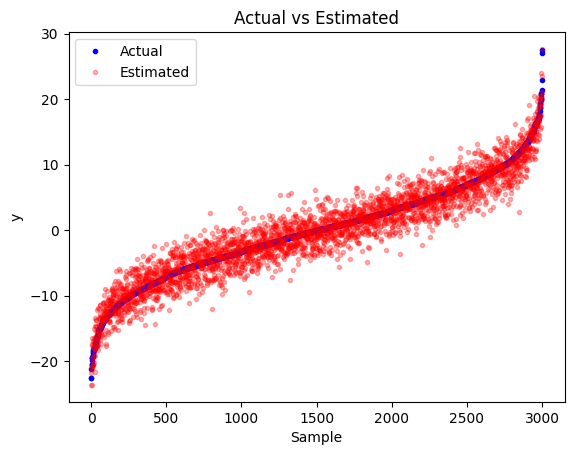

In [41]:
plot1 = plt.figure(1)
x_axis = [i for i in range(int(size*(1-training_data_percentage)))]
holder = test_y.argsort()
plt.plot(x_axis, test_y[holder], 'b.', label='Actual')
plt.plot(x_axis, y_est[holder], 'r.', alpha=0.3, label='Estimated')
plt.xlabel('Sample')
plt.ylabel('y')
plt.title('Actual vs Estimated')
plt.legend()

In [42]:
def gram_schmidt(x):

    n = len(x)
    x_orth = [x[0]]

    for i in range(1, n):
        x_orth_i = x[i]

        for j in range(i):
            term = np.matmul(np.transpose(x_orth[j]), x[i])
            term = term / np.matmul(np.transpose(x_orth[j]), x_orth[j])
            term = term * x_orth[j]
            x_orth_i = x_orth_i - term

        x_orth.append(x_orth_i)

    return x_orth

In [43]:
x_orth_T = gram_schmidt(np.transpose(train_x))
x_orth = np.transpose(x_orth_T)

x_orth_T_x_orth = np.matmul(x_orth_T, x_orth)
x_orth_T_x_orth_inv = np.linalg.inv(x_orth_T_x_orth)
x_orth_T_x_orth_inv_x_orth_T = np.matmul(x_orth_T_x_orth_inv, x_orth_T)

In [44]:
train_y_orth = 2*x_orth[:, 0] + 3*x_orth[: ,1] - 4*x_orth[: ,2]

In [45]:
orth_estimator = np.matmul(x_orth_T_x_orth_inv_x_orth_T, train_y_orth)
orth_estimator

array([ 2.        ,  3.        , -3.99999991])

In [46]:
print("Orthogonal Estimator:")
print("theta1:", orth_estimator[0])
print("theta2:", orth_estimator[1])
print("theta3:", orth_estimator[2])

Orthogonal Estimator:
theta1: 2.000000000000001
theta2: 2.9999999999999996
theta3: -3.9999999068677425


In [47]:
y_est_orth = np.matmul(test_x, orth_estimator)

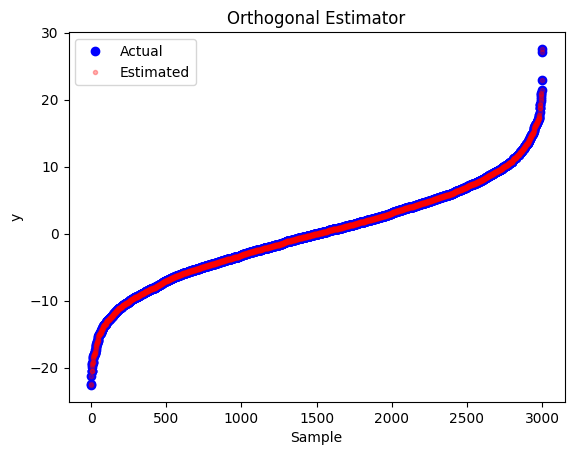

In [48]:
plot2 = plt.figure(2)
plt.plot(x_axis, test_y[holder], 'bo', label='Actual')
plt.plot(x_axis, y_est_orth[holder], 'r.', alpha=0.3, label='Estimated')
plt.xlabel('Sample')
plt.ylabel('y')
plt.title('Orthogonal Estimator')
plt.legend()

Text(0.5, 1.0, 'Error of Least Squares Estimator Without Orthogonalization')

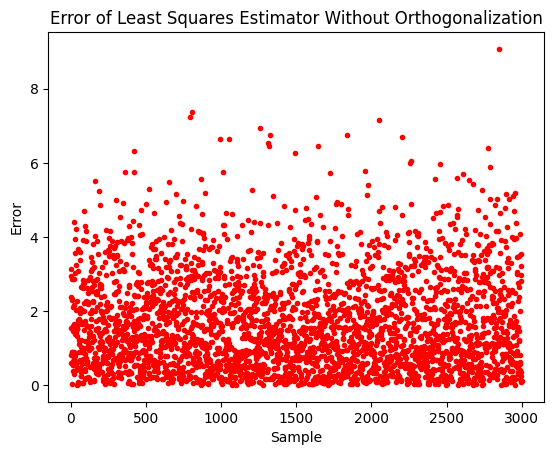

In [49]:
error1 = abs((test_y - y_est))
plot3 = plt.figure(3)
plt.plot(x_axis, error1[holder], 'r.')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.title('Error of Least Squares Estimator Without Orthogonalization')

Text(0.5, 1.0, 'Error of Least Squares Estimator With Orthogonalization')

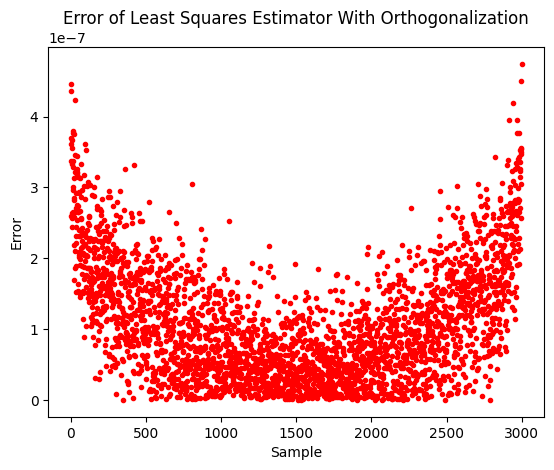

In [50]:
error2 = abs((test_y - y_est_orth))
plot4 = plt.figure(4)
plt.plot(x_axis, error2[holder], 'r.')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.title('Error of Least Squares Estimator With Orthogonalization')